# Chapter #1: Classification

## 1. Machine learning with scikit-learn

**What is machine learning?**
> - Machine learning is the process whereby **computers learn to make decisions from data without being explicitly programmed**.

**Examples of machine learning**
> - For example, learning to predict **whether an email is spam or not spam** given its content and sender.
> - Or learning to **cluster books into different categories** based on the words they contain, then assigning any new book to one of the existing clusters.

**Unsupervised learning**
> - **Unsupervised learning** is the process of **uncovering hidden patterns and structures from unlabeled data**.
> - For example, a business may wish to group its customers into distinct categories based on their purchasing behavior without knowing in advance what these categories are.
> - This is known as **clustering**, one branch of **unsupervised learning**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_01_ml_with_scikit_learn_img01.png">

**Supervised learning**
> - **Supervised learning** is a type of machine learning where **the values to be predicted are already known**, and a model is built with the aim of **accurately predicting values of previously unseen data**.
> - Supervised learning **uses features to predict the value of a target variable**, such as predicting a basketball player's position based on their points per game.
> - This course will exclusively focus on supervised learning.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_01_ml_with_scikit_learn_img02.png">

**Types of supervised learning**
> - There are **two types** of supervised learning:
> 1. **Classification** is used to predict the **label**, or **category**, of an observation.
>> - For example, we can predict whether a bank transaction is fraudulent or not,
>> - As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification,
> 2. **Regression** is used to predict **continuous values**.
>> - For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

**Naming conventions**
> - Note that what we call a **feature** throughout the course, others may call a **predictor variable** or **independent variable**.
> - Also, what we call the **target** variable, others may call **dependent variable** or **response variable**.

**Before you use supervised learning**
> - There are **some requirements** to satisfy before performing supervised learning:
>> - Our data **must not have missing values**,
>> - Our data **must be in numeric format**,
>> - Our data is **stored as pandas DataFrames or Series, or NumPy arrays**.
> - This requires some **exploratory data analysis** first to ensure data is in the correct format.
> - Various pandas methods for descriptive statistics, along with appropriate data visualizations, are useful in this step.

**scikit-learn syntax**
> - scikit-learn follows the **same syntax for all supervised learning models, which makes the workflow repeatable**.
> - Let's familiarize ourselves with the **general scikit-learn workflow syntax**, before we explore using real data later in the chapter:
>> - We **import a `Model`**, which is **a type of algorithm** for our supervised learning problem, from an `sklearn` module,
>>> - For example, the k-Nearest Neighbors model uses distance between observations to predict labels or values.
>> - We create a variable named `model`, and **instantiate the `Model`**,
>> - **A `model` is fit to the data**, where it learns patterns about the features and the target variable,
>>> - We fit the model to `X`, an array of our features, and `y`, an array of our target variable values.
>> - We then **use the `model`'s `.predict()` method**, passing six new observations, `X_new`.
>>> - For example, if feeding features from six emails to a spam classification model, an array of six values is returned,
>>> - A `1` indicates the model predicts that email is spam, and a `0` represents a prediction of not spam.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_01_ml_with_scikit_learn_img03.png">

### 1.1. Binary classification

In the video, you saw that there are **two types** of supervised learning — **classification** and **regression**. Recall that **binary** classification is used to predict a target variable that has **only two labels**, typically represented numerically with a **zero** or a **one**.

A dataset, `churn_df`, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the **target variable for binary classification**.

- Set up the workspace.

In [1]:
import pandas as pd
churn_df = pd.read_csv("./datasets/churn.csv").drop(columns="Unnamed: 0")
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


- **Possible Answers:**
> - `"customer_service_calls"`
> - `"total_night_charge"`
> - **`"churn"`**
> - `"account_length"`

### 1.2. The supervised learning workflow

Recall that **scikit-learn offers a repeatable workflow** for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents **the workflow of building a supervised learning model and making predictions**.

- Drag the code blocks into the correct order to represent how a supervised learning workflow would be executed.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_01_02_the_supervised_learning_workflow_img01.png">

## 2. The classification challenge

**The classification challenge**
> - Previously, we learned that **supervised learning uses labels**.
> - Let's discuss how we can **build a classification model**, or classifier, to predict the labels of unseen data.

**Classifying labels of unseen data**
> - There are **four steps**:
>> 1. **Build a model**,
>> 2. **Model learns** from the labeled data we pass to it,
>> 3. **Pass unlabeled data** to the model as input,
>> 4. **Model predicts** the labels of the unseen data.
> - As the classifier **learns** from the labeled data, we call this the **training data**.

**k-Nearest Neighbors**
> - Let's build our first model!
> - We'll use an algorithm called **k-Nearest Neighbors**, which is popular for classification problems.
> - The idea of k-Nearest Neighbors, or KNN, is **to predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should hav**e. KNN uses **majority voting**, which makes predictions based on what label the majority of nearest neighbors have.

**k-Nearest Neighbors**
> - Using this scatter plot as an example, **how do we classify the black observation?**

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img01.png">

**k-Nearest Neighbors**
> - If k equals **3**, we would classify it as **red**.
> - This is because **two of the three closest observations are red**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img02.png">

**k-Nearest Neighbors**
> - If k equals **5**, we would instead classify it as **blue**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img03.png">

**KNN Intuition**
> - To build intuition for KNN, **let's look at this scatter plot** displaying total evening charge against total day charge for customers of a telecom company.
> - The observations are colored in **blue for customers who have churned, and red for those who have not churned**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img04.png">

**KNN Intuition**
> - Here we have visualized the results of a KNN algorithm where the number of neighbors is **set to 15**.
> - KNN creates a **decision boundary** to predict if customers will churn.
> - Any customers in the area with a **gray background** are predicted to **churn**, and those in the area with a **red background** are predicted to **not churn**.
> - This boundary would be used to **make predictions on unseen data**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img05.png">

**Using scikit-learn to fit a classifier**
> - To fit a KNN model using scikit-learn, we **import `KNeighborsClassifier`** from `sklearn.neighbors`.
> - We **split our data** into `X`, a 2D array of our **features**, and `y`, a 1D array of the **target** values - in this case, churn status:
>> - scikit-learn requires that the **features are in an array where each column is a feature and each row a different observation**,
>> - Similarly, the **target needs to be a single column with the same number of observations as the feature data**,
>> - We use the `.values` attribute to **convert `X` and `y` to NumPy arrays**,
>> - Printing the **shape** of `X` and `y`, we see there are `3333` observations of `2` features, and `3333` observations of the target variable.
> - We then **instantiate** our `KNeighborsClassifier`, **setting `n_neighbors` equal to `15`**, and assign it to the variable `knn`.
> - Then we can **fit this classifier** to our labeled data by applying the classifier's `.fit()` method and passing two arguments: the **feature values**, `X`, and the **target values**, `y`.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img06.png">

**Predicting on unlabeled data**
> - Here we have a **set of new observations**, `X_new`.
> - Checking the **shape** of `X_new`, we see it has `3` rows and `2` columns, that is, three observations and two features.
> - We use the classifier's `.predict()` method and **pass it the unseen data** as a 2D NumPy array containing features in columns and observations in rows.
> - Printing the **predictions** returns a binary value for each observation or row in `X_new`.
> - It predicts `1`, which corresponds to `'churn'`, for the first observation, and `0`, which corresponds to `'no churn'`, for the second and third observations.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_02_the_classification_challenge_img07.png">

### 2.1. k-Nearest Neighbors: Fit

In this exercise, you will **build your first classification model** using the `churn_df` dataset, which has been preloaded for the remainder of the chapter.

The **features** to use will be `"account_length"` and `"customer_service_calls"`. The **target**, `"churn"`, needs to be a single column with the same number of observations as the feature data.

You will **convert the features and the target variable into NumPy arrays**, create an instance of a KNN classifier, and then fit it to the data.

`numpy` has also been preloaded for you as `np`.

- Set up the workspace.

In [2]:
import numpy as np

In [3]:
churn_df = pd.read_csv("./datasets/churn.csv").drop(columns="Unnamed: 0")
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


- Import `KNeighborsClassifier` from `sklearn.neighbors`.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

- Create an array called `X` containing values from the `"account_length"` and `"customer_service_calls"` columns, and an array called `y` for the values of the `"churn"` column.

In [5]:
X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

In [6]:
print(X.shape, y.shape)

(3333, 2) (3333,)


- Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors.

In [7]:
knn = KNeighborsClassifier(n_neighbors=6)

- Fit the classifier to the data using the `.fit()` method.

In [8]:
knn.fit(X, y);

### 2.2. k-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to **predict the label of new data points**. All available data was used for training, however, fortunately, **there are new observations available**. These have been preloaded for you as `X_new`.

The model `knn`, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

```
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
```

- Set up the workspace.

In [9]:
X_new = np.array([[ 30. ,  17.5],
                  [107. ,  24.1],
                  [213. ,  10.9]])

- Create `y_pred` by predicting the target values of the unseen features `X_new`.

In [10]:
y_pred = knn.predict(X_new)

- Print the predicted labels for the set of predictions.

In [11]:
y_pred

array([0, 1, 0], dtype=int64)

## 3. Measuring model performance

**Measuring model performance**
> - Now we can **make predictions** using a classifier, but **how do we know if the model is making correct predictions?** We can **evaluate** its performance!

**Measuring model performance**
> - In classification, **accuracy** is a commonly-used metric.
> - Accuracy is **the number of correct predictions divided by the total number of observations**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img01.png">

**Measuring model performance**
> - **How do we measure accuracy?**
>> - We could compute accuracy on **the data used to fit the classifier**,
>> - However, **as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data**, which is what we are interested in!

**Computing accuracy**
> - It is common to **split data into a training set and a test set**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img02.png">

**Computing accuracy**
> - We fit the classifier **using the training set**,

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img03.png">

**Computing accuracy**
> - Then we calculate the model's accuracy **against the test set's labels**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img04.png">

**Train/test split**
> - To do this, we **import** `train_test_split` from `sklearn.model_selection`.
> - We **call** `train_test_split`, passing our **features and targets**:
>> - We commonly use **20-30% of our data as the test set**,
>> - By setting the `test_size` argument to `0.3` we use 30% here,
>> - The `random_state` argument sets a **seed** for a random number generator that splits the data,
>> - Using the same number when repeating this step allows us to **reproduce the exact split and our downstream results**.
>> - It is best practice to **ensure our split reflects the proportion of labels in our data**,
>> - So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn,
>> - We achieve this by **setting `stratify` equal to `y`**,
>> - `train_test_split` returns **four arrays**: the **training data**, the **test data**, the **training labels**, and **the test labels**,
>> - We unpack these into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.
> - We then **instantiate** a KNN model and **fit** it to the **training data** using the `.fit()` method.
> - To check the **accuracy**, we use the `.score()` method, **passing `X_test` and `y_test`**.
>> - The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img05.png">

**Model complexity**
> - Let's discuss how to **interpret k**.
> - Recall that we discussed **decision boundaries**, which are **thresholds for determining what label a model assigns to an observation**.
> - In the image shown, **as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model**.
>> - Simpler models are **less able to detect relationships in the dataset**, which is known as **underfitting**.
> - In contrast, **complex models can be sensitive to noise in the training data**, rather than reflecting general trends.
>> - This is known as **overfitting**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img06.png">

**Model complexity and over/underfitting**
> - We can also **interpret k using a model complexity curve**.
> - With a KNN model, we can **calculate accuracy on the training and test sets using incremental k values, and plot the results**:
>> - We create empty **dictionaries** to store our **train and test accuracies**, and an **array** containing a **range of k values**.
>> - We use a `for` loop to **repeat our previous workflow**, building several models using a different number of `neighbors`:
>> - We loop through our `neighbors` array and, inside the loop, we **instantiate** a KNN model with `n_neighbors` equal to the `neighbor` iterator, and **fit** to the training data,
>> - We then **calculate** training and test set accuracy, **storing** the results in their respective dictionaries.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img07.png">

**Plotting our results**
> - After our for loop, we then **plot the training and test values**, including a legend and labels.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img08.png">

**Model complexity curve**
> - Here's the result! **As k increases beyond `15` we see overfitting** where performance plateaus on both test and training sets, as indicated in this plot.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img09.png">

**Model complexity curve**
> - The **peak test accuracy** actually occurs at around `13` neighbors.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch01_03_measuring_model_performance_img10.png">

### 3.1. Train/test split + computing accuracy

Now that you have learned about the **importance of splitting your data into training and test sets**, it's time to practice doing this on the `churn_df` dataset!

NumPy arrays have been created for you containing the features as `X` and the target variable as `y`. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the `.score()` method.

- Set up the workspace.

In [12]:
churn_df = pd.read_csv("./datasets/churn.csv").drop(columns="Unnamed: 0")
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


In [13]:
X, y = churn_df.drop(columns="churn").values, churn_df["churn"].values

In [14]:
print(X.shape, y.shape)

(3333, 6) (3333,)


- Import `train_test_split` from `sklearn.model_selection`.

In [15]:
from sklearn.model_selection import train_test_split

- Split `X` and `y` into training and test sets, setting `test_size` equal to 20%, `random_state` to 42, and ensuring the target label proportions reflect that of the original dataset.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape)

(2666, 6) (2666,) (667, 6) (667,)


- Fit the `knn` model to the training data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train);

- Compute and print the model's accuracy for the test data.

In [19]:
knn.score(X_test, y_test)

0.8740629685157422

### 3.2. Overfitting and underfitting

Interpreting **model complexity** is a great way to **evaluate performance** when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different `n_neighbor` values, which you will plot in the next exercise.

The training and test sets have been created from the `churn_df` dataset and preloaded as `X_train`, `X_test`, `y_train`, and `y_test`.

In addition, `KNeighborsClassifier` has been imported for you along with `numpy` as `np`.

- Set up the workspace.

In [20]:
import pickle
with open("./assets/ch01_03__02_overfitting_and_underfitting_pickled01.pkl", mode="rb") as f_bin:
    pickled_objs = pickle.load(f_bin)

In [21]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [22]:
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape)

(1999, 19) (1999,) (1334, 19) (1334,)


- Create `neighbors` as a `numpy` array of values from `1` up to and including `12`.

In [23]:
import numpy as np
neighbors = np.arange(1, 13)

In [24]:
train_accuracies = {}
test_accuracies = {}

- Instantiate a KNN classifier, with the number of neighbors equal to the `neighbor` iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the `.score()` method, and assign the results to the index of the `train_accuracies` and `test_accuracies` dictionaries, respectively.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [27]:
print("Training accuracy:\n")
for n, s in train_accuracies.items():
    print(f"  Neighbors: {n} --> Accuracy: {s:.2f}")

Training accuracy:

  Neighbors: 1 --> Accuracy: 1.00
  Neighbors: 2 --> Accuracy: 0.89
  Neighbors: 3 --> Accuracy: 0.91
  Neighbors: 4 --> Accuracy: 0.87
  Neighbors: 5 --> Accuracy: 0.88
  Neighbors: 6 --> Accuracy: 0.87
  Neighbors: 7 --> Accuracy: 0.88
  Neighbors: 8 --> Accuracy: 0.87
  Neighbors: 9 --> Accuracy: 0.87
  Neighbors: 10 --> Accuracy: 0.86
  Neighbors: 11 --> Accuracy: 0.86
  Neighbors: 12 --> Accuracy: 0.86


In [28]:
print("Test accuracy:\n")
for n, s in test_accuracies.items():
    print(f"  Neighbors: {n} --> Accuracy: {s:.2f}")

Test accuracy:

  Neighbors: 1 --> Accuracy: 0.79
  Neighbors: 2 --> Accuracy: 0.85
  Neighbors: 3 --> Accuracy: 0.84
  Neighbors: 4 --> Accuracy: 0.86
  Neighbors: 5 --> Accuracy: 0.86
  Neighbors: 6 --> Accuracy: 0.86
  Neighbors: 7 --> Accuracy: 0.86
  Neighbors: 8 --> Accuracy: 0.86
  Neighbors: 9 --> Accuracy: 0.86
  Neighbors: 10 --> Accuracy: 0.86
  Neighbors: 11 --> Accuracy: 0.86
  Neighbors: 12 --> Accuracy: 0.86


### 3.3. Visualizing model complexity

Now you have calculated the **accuracy** of the KNN model on the training and test sets using various values of `n_neighbors`, you can create a **model complexity curve** to visualize **how performance changes as the model becomes less complex!**

The variables `neighbors`, `train_accuracies`, and `test_accuracies`, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

- Add a title `"KNN: Varying Number of Neighbors"`.
- Plot the `.values()` method of `train_accuracies` on the y-`axis` against `neighbors` on the x-`axis`, with a label of `"Training Accuracy"`.
- Plot the `.values()` method of `test_accuracies` on the y-`axis` against `neighbors` on the x-`axis`, with a label of `"Testing Accuracy"`.
- Display the plot.

- Set up the workspace.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

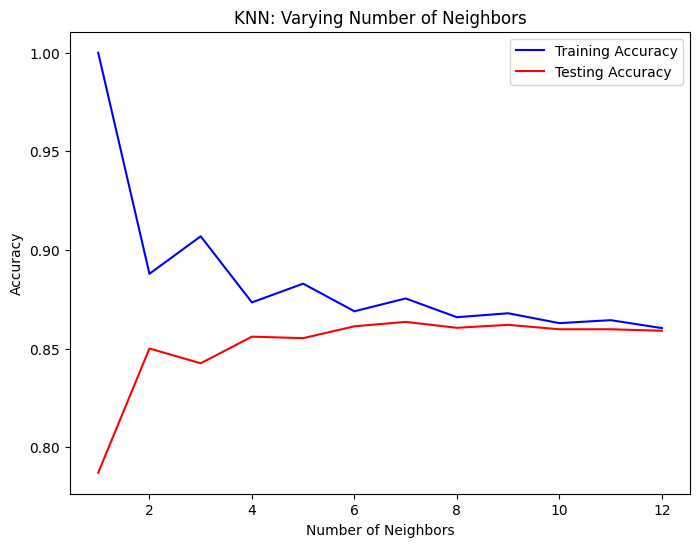

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=neighbors, y=train_accuracies.values(), color="blue", label="Training Accuracy", ax=ax)
sns.lineplot(x=neighbors, y=test_accuracies.values(), color="red", label="Testing Accuracy", ax=ax)
ax.set_title("KNN: Varying Number of Neighbors")
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Accuracy");